In [3]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import math
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
%matplotlib inline
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from sympy import *

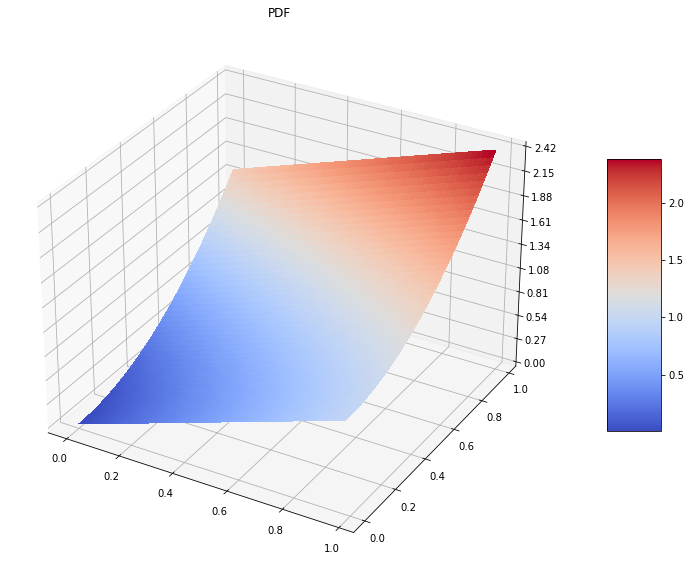

In [4]:
fig = plt.figure(figsize=(20,10))
ax = fig.gca(projection='3d')
# Make data.
X = np.arange(0, 1, 0.01*2)
Y = np.arange(0, 1, 0.01*2)
X, Y = np.meshgrid(X, Y)
R = X + 1.5*(Y**2)


# Plot the surface.
surf = ax.plot_surface(X, Y, R, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title("PDF")
plt.show()

In [5]:
def bivariate_normal(p,mux,muy,stdx,stdy):
    fig = plt.figure(figsize=(20,10))
    ax = fig.gca(projection='3d')
    # Make data.
    X = np.arange(-8, 8, 0.16)
    Y = np.arange(-8, 8, 0.16)
    X, Y = np.meshgrid(X, Y)
    R = 1/(2*np.pi*stdx*stdy*np.sqrt((1-p**2))) * np.exp(-1/(2*(1-p**2))*(((X-mux)/stdx)**2 -2*p*(((X-mux)*(Y-muy))/(stdx*stdy))+((Y-muy)/stdy)**2))


    # Plot the surface.
    surf = ax.plot_surface(X, Y, R, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)

    # Customize the z axis.
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.title('Normal')
    plt.show()

interact(bivariate_normal, p=widgets.FloatSlider(value=0,min=-0.99,max=0.99),mux=widgets.FloatSlider(value=0,min=-5,max=5),muy=widgets.FloatSlider(value=0,min=-5,max=5),stdx=widgets.FloatSlider(value=1,min=0,max=10),stdy=widgets.FloatSlider(value=1,min=0,max=10))

interactive(children=(FloatSlider(value=0.0, description='p', max=0.99, min=-0.99), FloatSlider(value=0.0, des…

<function __main__.bivariate_normal(p, mux, muy, stdx, stdy)>

$$CDF = \int\int x+\frac{3}{2}y^2dxdy$$

In [6]:
init_printing(use_unicode=False, wrap_line=False)
x = Symbol('x')
y = Symbol('y')
integrate(integrate(x + 1.5*(y**2),x),y)

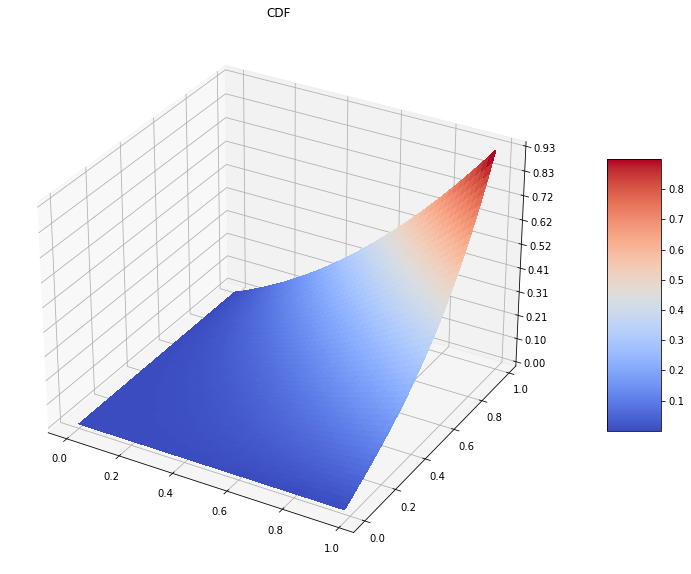

In [7]:
fig = plt.figure(figsize=(20,10))
ax = fig.gca(projection='3d')
# Make data.
X = np.arange(0, 1, 0.01*2)
Y = np.arange(0, 1, 0.01*2)
X, Y = np.meshgrid(X, Y)
R = 0.5*X**2*Y + 0.5 *X*Y**3


# Plot the surface.
surf = ax.plot_surface(X, Y, R, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title("CDF")
plt.show()

$$F_X(x) = \int_0^1x+\frac{3}{2}y^2dy$$

In [8]:
init_printing(use_unicode=False, wrap_line=False)
x = Symbol('x')
y = Symbol('y')
integrate(x + 1.5*(y**2),(y,0,1))

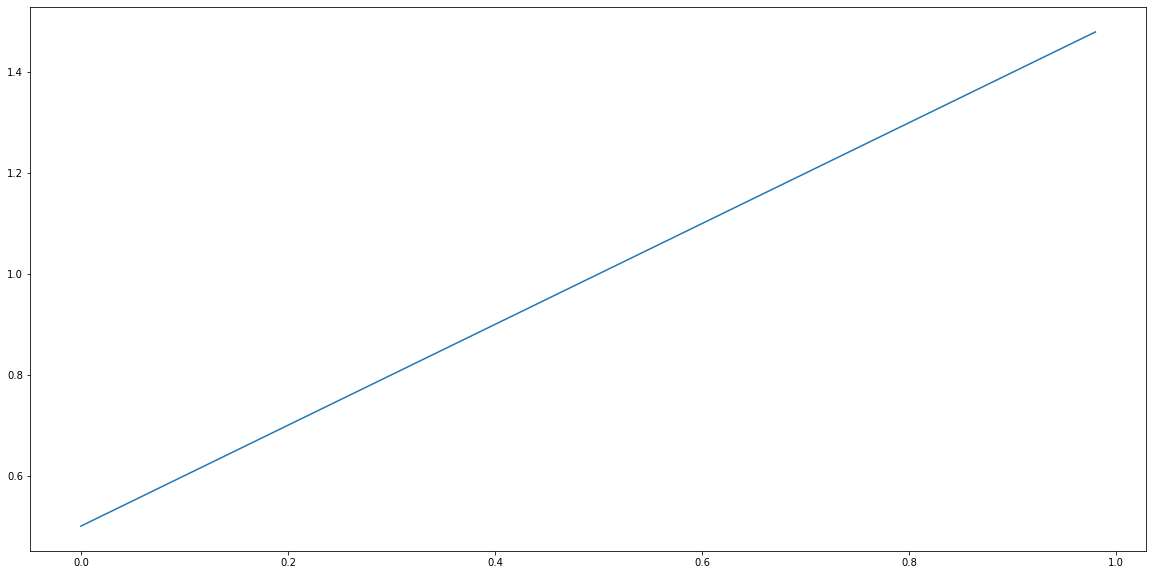

In [9]:
fig = plt.figure(figsize=(20,10))
# Make data.
X = np.arange(0, 1, 0.01*2)
R = X +0.5
plt.plot(X,R)

$$F_Y(y) = \int_0^1x+\frac{3}{2}y^2dx$$

In [10]:
init_printing(use_unicode=False, wrap_line=False)
x = Symbol('x')
y = Symbol('y')
integrate(x + 1.5*(y**2),(x,0,1))

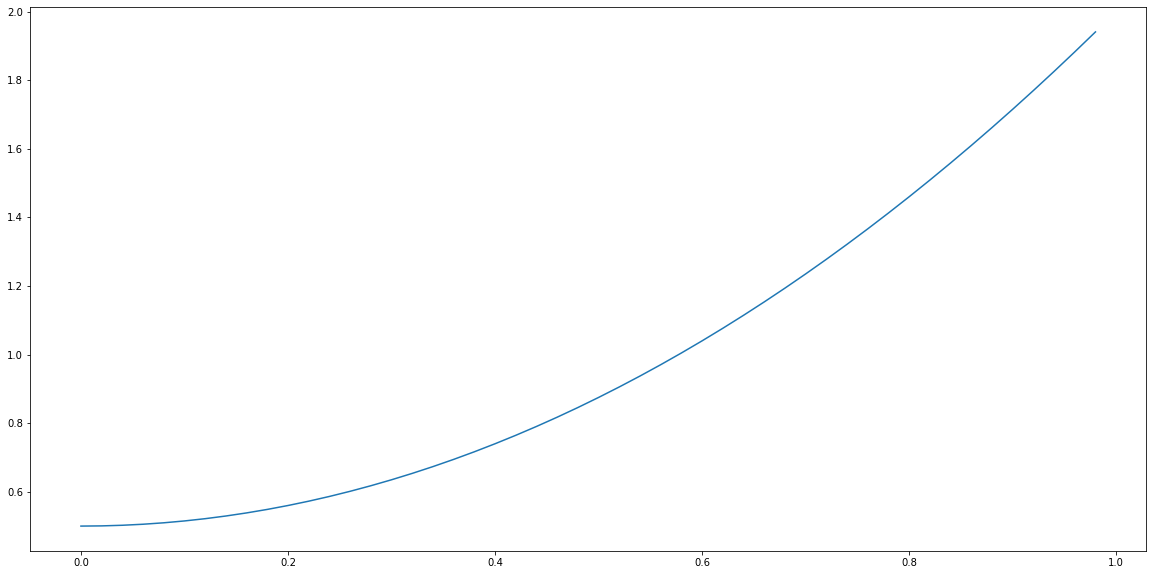

In [11]:
fig = plt.figure(figsize=(20,10))
# Make data.
Y = np.arange(0, 1, 0.01*2)
R = 1.5*(Y**2) +0.5
plt.plot(X,R)

$$ E(X) = \int_0^1\int_0^1 x (x + \frac{3}{2}y^2) dxdy$$

In [12]:
init_printing(use_unicode=False, wrap_line=False)
x = Symbol('x')
y = Symbol('y')
ex = integrate(integrate(x*(x + 1.5*(y**2)),(x,0,1)),(y,0,1))
ex

$$ E(Y) = \int_0^1\int_0^1 y (x + \frac{3}{2}y^2) dxdy$$

In [13]:
init_printing(use_unicode=False, wrap_line=False)
x = Symbol('x')
y = Symbol('y')
ey = integrate(integrate(y*(x + 1.5*(y**2)),(x,0,1)),(y,0,1))
ey

$$ E(XY) = \int_0^1\int_0^1 xy (x + \frac{3}{2}y^2) dxdy$$

In [14]:
init_printing(use_unicode=False, wrap_line=False)
x = Symbol('x')
y = Symbol('y')
exy = integrate(integrate((x**2)*y + 1.5*x*(y**2),(x,0,1)),(y,0,1))
exy

$$ Cov(X,Y) = E[XY] - E[X]E[Y]$$ 

In [15]:
Cov = exy-ex*ey
Cov

$$ Var(X) = Cov(X,X) = E[X^2] - (E[X])^2$$ 

$$ E(X^2) = \int_0^1\int_0^1 x^2 (x + \frac{3}{2}y^2) dxdy$$

In [16]:
init_printing(use_unicode=False, wrap_line=False)
x = Symbol('x')
y = Symbol('y')
exsquare = integrate(integrate((x**2)*(x + 1.5*(y**2)),(x,0,1)),(y,0,1))
exsquare

$$ Var(X) = Cov(X,X) = E[X^2] - (E[X])^2$$ 

In [17]:
varx = exsquare - ex**2
varx

In [18]:
init_printing(use_unicode=False, wrap_line=False)
x = Symbol('x')
y = Symbol('y')
eysquare = integrate(integrate((y**2)*(x + 1.5*(y**2)),(x,0,1)),(y,0,1))
eysquare

In [19]:
vary = eysquare - ey**2
vary

$$\rho = \frac{Cov(X,Y)}{\sigma_X\sigma_Y}$$

In [20]:
correlation = Cov/(math.sqrt(varx)*math.sqrt(vary))
correlation